[INFO] Loading images ...
[INFO] Processing Healthy_Leaf ...
[INFO] Processing Healthy_Nut ...
[INFO] Processing Healthy_Trunk ...
[INFO] Processing Mahali_Koleroga ...
[INFO] Processing Stem_bleeding ...
[INFO] Processing yellow_leaf spot_disease ...
[INFO] Image loading completed
['Healthy_Leaf' 'Healthy_Nut' 'Healthy_Trunk' 'Mahali_Koleroga'
 'Stem_bleeding' 'yellow_leaf spot_disease']
[INFO] Spliting data to train, test
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                        

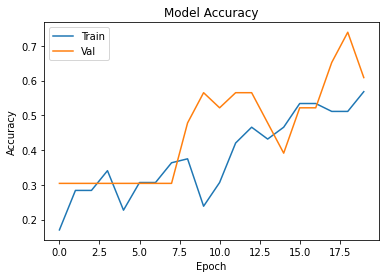

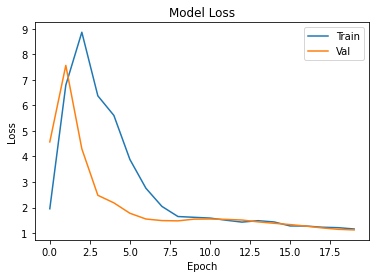

[INFO] Calculating model accuracy
1/1 [==============================] - 1s 1s/step - loss: 1.1899 - accuracy: 0.5357
Test Accuracy: 53.57142686843872
1/1 [==============================] - 2s 2s/step
[[2.1513805e-03 9.8303741e-01 3.8330127e-03 2.3752474e-03 8.4497184e-03
  1.5322329e-04]]
Healthy_Leaf 0.22 %
Healthy_Nut 98.3 %
Healthy_Trunk 0.38 %
Mahali_Koleroga 0.24 %
Stem_bleeding 0.84 %
yellow_leaf spot_disease 0.02 %


In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import pathlib
#1
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
path = pathlib.Path('C:\Dataset')
width=256
height=256
depth=3
#2
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
#3  
image_list, label_list = [], []
l=[]
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(path)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{path}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{path}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                l.append(image)
                image_directory = f"{path}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")
#4
image_size = len(image_list)

#5
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
#pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

#6
print(label_binarizer.classes_)

#7
#print(image_labels)

#8
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

#9
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

#10
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

#11
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

#Create models architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (3,3), activation='relu', input_shape=inputShape))

#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another convolutional layer
model.add( Conv2D(32, (3,3), activation='relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flatenning layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 125 neurons
model.add(Dense(125, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(6, activation='softmax'))

#12...................................
model.summary()

#13
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])

#14
history = model.fit(x_train, y_train, batch_size= 256,
                 epochs = 20, 
                 validation_split = 0.2)

#15
model.evaluate(x_test, y_test)[1]

#16
#pwd

#17
#Visualize model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

#18
#Visualize model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

#19
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

#20
Remedy = ['','','','','','Disease can be controlled by spraying with one per cent Bordeaux mixture or Dithane M 45 @ 3 gram/Liter.']

#21
#image_dir="C:\Dataset\plant_folder\Healthy_Leaf\\Healthy_leaf (2).jpg"
image_dir="C:\Dataset\plant_folder\Healthy_Nut\\healthy_nut (8).jpg"
#image_dir="C:\Dataset\plant_folder\Healthy_Trunk\\Healthy (17).jpg"
#image_dir="C:\Dataset\plant_folder\Mahali_Koleroga\\diseases_nut (1).jpg"
#image_dir="C:\Dataset\plant_folder\Stem_bleeding\\diseased (3).jpg"
#image_dir="C:\Dataset\plant_folder\yellow_leaf spot_disease\\yellow_leaf_spot (11).jpeg"
#image_dir = "C://Users//hp//Downloads//Ayurvedic+Healing_Betel+leaf+versus+tobacco.jpg"
im=convert_image_to_array(image_dir)
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)

#22
result=model.predict(npp_image)
print(result)

#23
#result=model.predict(npp_image)
itemindex = np.where(result==np.max(result))
for i in range(len(result[0])):
    print(label_binarizer.classes_[i]+" "+str(round(result[0][i]*100,2))+ " %")
if itemindex[1][0]>2:
    print("\nRemedy for the "+ label_binarizer.classes_[itemindex[1][0]]+" :\n",Remedy[itemindex[1][0]])
    